# Làm quen với pandas 

## Bài 5: Giới thiệu hàm apply

Bs. Lê Ngọc Khả Nhi,
03/09/2018.

Chào các bạn, trong bài thứ 5 của series "Làm quen với pandas", Nhi sẽ giới thiệu về hàm apply trong thư viện pandas. Các bạn  đã từng dùng ngôn ngữ R chắc đã biết về công dụng của nhóm hàm apply, cho phép lặp lại cùng một quy trình cho hàng hay cột trong dataframe. Hàm apply của pandas trong Python cũng hoạt động theo cùng cơ chế này.

Chúng ta lấy thí dụ một dataset có nhiều biến (cột) như sau (đây là dữ liệu từ 1 thử nghiệm lâm sàng về bệnh lý ngưng thở khi  ngủ. Để đơn giản, ta chỉ xét 1 vài biến định lượng quan trọng là AHI, RDI, ODI và RERA ở thời điểm Baseline

In [3]:
import pandas as pd

In [9]:
data=pd.read_csv("prepoststudy.csv",sep=';')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 30 columns):
Id                   50 non-null object
Time                 50 non-null object
TST                  50 non-null int64
dtMM                 50 non-null float64
dtRERA               50 non-null float64
dtAH                 50 non-null float64
dtRD                 50 non-null float64
Allergy              48 non-null object
Snoring              50 non-null object
Apnea                50 non-null object
Behavor              47 non-null object
Daysleep             48 non-null object
SchoolPerformance    23 non-null object
Sex                  50 non-null object
Age                  50 non-null float64
Height               50 non-null float64
Weight               50 non-null float64
BMI                  50 non-null float64
nMM                  50 non-null int64
nRERA                50 non-null int64
nAH                  50 non-null int64
nRD                  50 non-null int64
nAr           

In [10]:
baseline_df=data.loc[(data.Time == 'Baseline'),:]

baseline_df.head()

,Id,Time,TST,dtMM,dtRERA,dtAH,dtRD,Allergy,Snoring,Apnea,...,nAH,nRD,nAr,nOD,ARI,AHI,RERA,RDI,ODI,MMSI
0,s01,Baseline,295,261.510000,40.605000,4.918333,45.523333,Yes,Yes,Yes,...,134,153,118,95,24.000000,27.254237,3.864407,31.118644,19.322034,26.847458
1,s02,Baseline,395,249.878333,2.365000,200.206667,202.571667,Yes,Yes,Yes,...,166,167,60,402,9.113924,25.215190,0.151899,25.367089,61.063291,22.632911
2,s03,Baseline,486,129.626667,103.085000,25.788333,128.873333,Yes,Yes,Yes,...,115,126,129,100,15.925926,14.197531,1.358025,15.555556,12.345679,20.123457
3,s04,Baseline,419,417.578333,4.013333,83.340000,87.353333,No,Yes,Yes,...,223,223,206,190,29.498807,31.933174,0.000000,31.933174,27.207637,22.625298
4,s05,Baseline,504,69.763333,0.000000,49.123333,49.123333,No,Yes,Yes,...,87,87,127,23,15.119048,10.357143,0.000000,10.357143,2.738095,12.857143


Trong Python, ta có thể làm 1 phép tính đơn giản, thí dụ bình phương, căn bậc 2, nhân, chia cộng trừ ... cho toàn bộ dataframe mà không cần sử dụng đến vòng lặp, như trong thí dụ sau:

In [199]:
baseline_df[['AHI','ODI']]**.5

,AHI,ODI
0,5.220559,4.395684
1,5.021473,7.814300
2,3.767961,3.513642
3,5.650945,5.216094
4,3.218252,1.654719
5,2.391574,1.059007
6,3.039662,2.504748
7,2.407560,1.532928
8,4.504293,4.161681
9,3.483508,1.835970


Tuy nhiên, cách làm trên chỉ dùng được cho các phép tính đơn giản, một cách làm phổ quát hơn, đó là tạo ra hàm tính toán, rồi áp dụng hàm này kết hợp với apply. Trong thí dụ sau, Nhi tạo ra 1 hàm power với tùy chỉnh n=0.5 tương ứng với căn bậc 2, n=2 tương ứng với bình phương. Dùng hàm apply và hàm power này cho phép ta khai căn hoặc bình phương cho mỗi biến trong dataframe:

In [210]:
def power(x,n):
    return x ** n

baseline_df[['AHI','ODI']].apply(power,n=0.5)

,AHI,ODI
0,5.220559,4.395684
1,5.021473,7.814300
2,3.767961,3.513642
3,5.650945,5.216094
4,3.218252,1.654719
5,2.391574,1.059007
6,3.039662,2.504748
7,2.407560,1.532928
8,4.504293,4.161681
9,3.483508,1.835970


In [211]:
baseline_df[['AHI','ODI']].apply(power,n=2)

,AHI,ODI
0,742.793450,373.340994
1,635.805800,3728.725525
2,201.569883,152.415790
3,1019.727616,740.255524
4,107.270408,7.497166
5,32.714124,1.257752
6,85.369168,39.360118
7,33.597611,5.521886
8,411.629716,299.968116
9,147.254135,11.362202


Tương tự, một số phép tính thống kê mô tả đã được hỗ trợ sẵn cho dataframe, ta không cần dùng đến hàm hay vòng lặp để áp dụng chúng cho hàng loạt biến. 

Nhưng ta hoàn toàn có thể dùng hàm apply nếu thích, thí dụ ta có đến 3 cách khác nhau để tính trung vị (hàm median của numpy) cho mỗi biến (cột), cách thứ nhất là dùng trực tiếp hàm median như 1 method trên dataframe của pandas

In [18]:
baseline_df[['AHI','RDI','ODI','TST']].median()

AHI     11.294118
RDI     12.470588
ODI      6.273764
TST    482.000000
dtype: float64

Hoặc đưa hàm median (của numpy) vào trong hàm apply

In [23]:
import numpy as np

baseline_df[['AHI','RDI','ODI','TST']].apply(np.median)

AHI     11.294118
RDI     12.470588
ODI      6.273764
TST    482.000000
dtype: float64

Một cách phổ quát, Nhi tạo 1 hàm quantile để tính bách phân vị thứ p cho 1 biến x, sau đó áp dụng hàm này với hàm apply để tính Median với p=0.5

In [138]:
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

baseline_df[['AHI','RDI','ODI','TST']].apply(quantile,p=0.5)

AHI     11.294118
RDI     12.470588
ODI      6.273764
TST    482.000000
dtype: float64

Đến đây, các bạn đã nhận ra quy tắc sử dụng hàm apply, đó là những tùy chỉnh của hàm cần áp dụng sẽ được đặt nối tiếp nhau, ngay sau tên hàm, thí dụ tùy chỉnh q của hàm quantile của numpy trong thí dụ sau:

Kết quả của hàm apply sẽ cho ra 1 bảng mà mỗi hàng tương ứng với q=0.05, 0.5, 0.9 và 0.975:

In [136]:
baseline_df[['AHI','RDI','ODI','TST']].apply(np.quantile,q=[0.05,0.5,0.9,0.975],axis=0)

,AHI,RDI,ODI,TST
0,2.775176,4.330647,0.460671,296.2
1,11.294118,12.470588,6.273764,482.0
2,28.151695,30.534823,24.053396,527.6
3,78.897479,78.897479,94.610142,537.0


Hàm apply có thể dùng cho hàng/cột tùy thích, với tùy chỉnh axis=0 cho cột, axis=1 cho hàng

In [30]:
baseline_df[['AHI','RDI','ODI','RERA']].apply(np.mean,axis=0)

AHI     18.862785
RDI     20.613449
ODI     14.949748
RERA     1.788262
dtype: float64

In [49]:
baseline_df[['AHI','RDI','ODI','RERA']].apply(np.mean,axis=1)

0      20.389831
1      27.949367
2      10.864198
3      22.768496
4       5.863095
5       3.140187
6       6.416350
7       3.877285
8      14.907216
9       6.910112
10     10.175676
11    110.904573
12      2.178423
13      3.765060
14      5.852601
15      1.576819
16     14.943182
17      8.647059
18      7.912713
19      3.805556
20      7.961538
21     13.604651
22     17.608696
23      7.028200
24     12.288136
dtype: float64

Trong thí dụ sau, Nhi viết 1 hàm cho phép tính hệ số tương quan Pearson giữa 1 biến X và 1 biến đích (target), sau đó dùng hàm apply và hàm correlation này để khảo sát tương quan giữa hàng loạt biến và biến đích, thí dụ BMI:

In [150]:
def correlation(x,target):
    return np.corrcoef(x,target)[1,0]

baseline_df[['AHI','RDI','ODI','RERA']].apply(correlation,target=baseline_df['BMI'])

AHI     0.658915
RDI     0.653782
ODI     0.589516
RERA   -0.216335
dtype: float64

Một thí dụ khác, ta tạo ra hàm count_missing để đếm số trường hợp thiếu sót dữ liệu, sau đó dùng apply để áp dụng quy trình này cho toàn bộ dataframe, theo cột (biến) hay hàng (cá thể)

In [70]:
def count_missing(vec):
    null_vec = pd.isnull(vec) 
    null_count = np.sum(null_vec) 
    return null_count

In [71]:
data.apply(count_missing)

Id                    0
Time                  0
TST                   0
dtMM                  0
dtRERA                0
dtAH                  0
dtRD                  0
Allergy               2
Snoring               0
Apnea                 0
Behavor               3
Daysleep              2
SchoolPerformance    27
Sex                   0
Age                   0
Height                0
Weight                0
BMI                   0
nMM                   0
nRERA                 0
nAH                   0
nRD                   0
nAr                   0
nOD                   0
ARI                   0
AHI                   0
RERA                  0
RDI                   0
ODI                   0
MMSI                  0
dtype: int64

In [74]:
data.apply(count_missing, axis=1)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    3
24    1
25    0
26    1
27    3
28    0
29    0
30    0
31    0
32    1
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    1
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

Hàm apply không chỉ dùng được cho những phép tính và xuất kết quả số, nó có thể dùng tốt cho các hàm đồ họa, thí dụ vẽ biểu đồ tuyến kí (chuỗi thời gian), histogram hoặc densityplot cho hàng loạt biến :

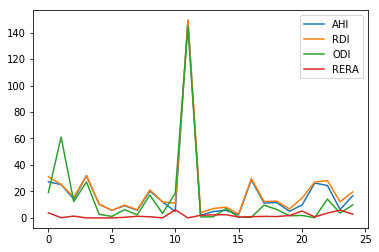

In [92]:
import matplotlib.pyplot as plt

baseline_df[['AHI','RDI','ODI','RERA']].apply(plt.plot,axis=0)
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AHI    AxesSubplot(0.125,0.125;0.775x0.755)
RDI    AxesSubplot(0.125,0.125;0.775x0.755)
ODI    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

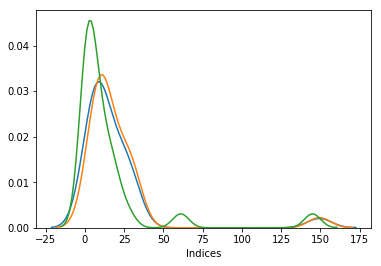

In [215]:
import seaborn as sns

baseline_df[['AHI','RDI','ODI']].apply(sns.distplot,
                                              hist=False,
                                              kde=True,
                                              axlabel="Indices",
                                              axis=0)

AHI    ([9.0, 6.0, 2.0, 3.0, 3.0, 1.0, 0.0, 0.0, 0.0,...
RDI    ([7.0, 7.0, 3.0, 2.0, 5.0, 0.0, 0.0, 0.0, 0.0,...
ODI    ([12.0, 5.0, 3.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0...
dtype: object

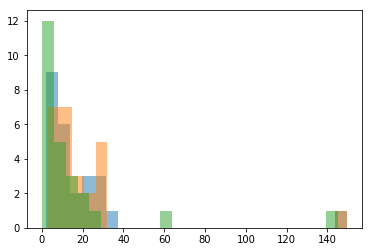

In [214]:
baseline_df[['AHI','RDI','ODI']].apply(plt.hist,axis=0,alpha=0.5,bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, a

AHI    AxesSubplot(0.125,0.125;0.775x0.755)
RDI    AxesSubplot(0.125,0.125;0.775x0.755)
ODI    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

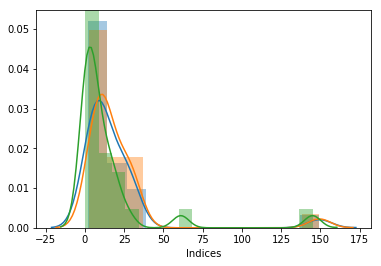

In [218]:
baseline_df[['AHI','RDI','ODI']].apply(sns.distplot,
                                              hist=True,
                                              kde=True,
                                              axlabel="Indices",
                                              axis=0)

Bài thực hành đến đây là hết. Hẹn gặp lại các bạn trong một bài khác.